In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Final Dataset.csv', parse_dates=True, index_col=0)

In [ ]:
df.head()

,Humidity,Irradiance,Temperature_C,Cloud_Cover,Snowfall,PV_Output
time,,,,,,
01-01-2019 00:00,0.005,0.0,5.068,0.568,0.0,0.0
01-01-2019 01:00,0.005,0.0,5.011,0.649,0.0,0.0
01-01-2019 02:00,0.005,0.0,4.927,0.749,0.0,0.0
01-01-2019 03:00,0.005,0.0,4.893,0.853,0.0,0.0
01-01-2019 04:00,0.005,0.0,4.937,0.930,0.0,0.0


In [ ]:
df.tail()

,Humidity,Irradiance,Temperature_C,Cloud_Cover,Snowfall,PV_Output
time,,,,,,
31-12-2024 19:00,0.005,0.0,5.337,0.480,0.0,0.0
31-12-2024 20:00,0.005,0.0,4.954,0.428,0.0,0.0
31-12-2024 21:00,0.005,0.0,4.631,0.441,0.0,0.0
31-12-2024 22:00,0.005,0.0,4.511,0.558,0.0,0.0
31-12-2024 23:00,0.005,0.0,4.506,0.681,0.0,0.0


In [ ]:
df = pd.read_csv('Final Dataset.csv')

# Clean column names
df.columns = [c.strip() for c in df.columns]
if 'PV Output' in df.columns:
    df.rename(columns={'PV Output': 'PV_Output'}, inplace=True)

# Make sure your time column is parsed as datetime
df['time'] = pd.to_datetime(df['time'], dayfirst=True, errors='coerce')

# Drop any rows where time could not be parsed
df = df.dropna(subset=['time'])

# Set datetime column as index
df = df.set_index('time').sort_index()

# Resample to daily (mean or sum depending on your need)
df_daily = df.resample('D').sum(numeric_only=True)

print("Data range:", df_daily.index.min(), "to", df_daily.index.max())
df_daily.head()

Data range: 2019-01-01 00:00:00 to 2024-12-31 00:00:00


,Humidity,Irradiance,Temperature_C,Cloud_Cover,Snowfall,PV_Output
time,,,,,,
2019-01-01,0.136,144.779,140.444,20.443,0.000,0.068
2019-01-02,0.131,584.609,148.649,13.754,0.000,0.588
2019-01-03,0.120,317.552,143.394,17.781,0.000,0.199
2019-01-04,0.112,497.333,77.887,14.528,0.000,0.416
2019-01-05,0.142,474.780,160.730,15.532,0.023,0.550


<Axes: xlabel='time'>

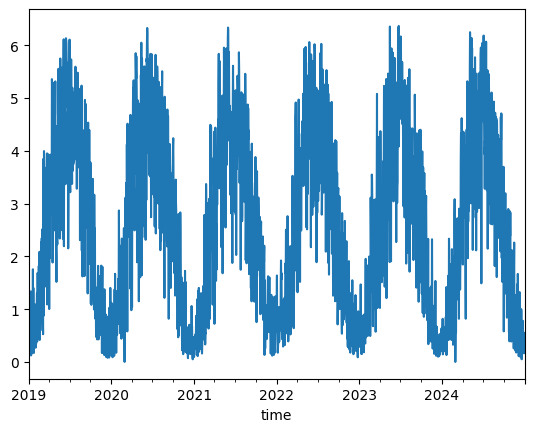

In [ ]:
df_daily['PV_Output'].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df_daily['PV_Output'])

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df_daily['PV_Output'])

ADF Test Statistic : -2.574127946794259
p-value : 0.09846325477047069
#Lags Used : 14
Number of Observations Used : 2177
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df_daily['PV_Output_FD'] = df_daily['PV_Output'] - df_daily['PV_Output'].shift(1)

In [ ]:
df_daily['PV_Output'].shift(1)

,PV_Output
time,
2019-01-01,NaN
2019-01-02,0.068
2019-01-03,0.588
2019-01-04,0.199
2019-01-05,0.416
...,...
2024-12-27,0.288
2024-12-28,0.559
2024-12-29,0.163


In [ ]:
df_daily['Seasonal First Difference'] = df_daily['PV_Output']-df_daily['PV_Output'].shift(365)

In [ ]:
df_daily.head()

,Humidity,Irradiance,Temperature_C,Cloud_Cover,Snowfall,PV_Output,PV_Output_FD,Seasonal First Difference
time,,,,,,,,
2019-01-01,0.136,144.779,140.444,20.443,0.000,0.068,NaN,NaN
2019-01-02,0.131,584.609,148.649,13.754,0.000,0.588,0.520,NaN
2019-01-03,0.120,317.552,143.394,17.781,0.000,0.199,-0.389,NaN
2019-01-04,0.112,497.333,77.887,14.528,0.000,0.416,0.217,NaN
2019-01-05,0.142,474.780,160.730,15.532,0.023,0.550,0.134,NaN


In [ ]:
adfuller_test(df_daily['Seasonal First Difference'].dropna())

ADF Test Statistic : -12.988046035186882
p-value : 2.8508157694138538e-24
#Lags Used : 7
Number of Observations Used : 1819
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='time'>

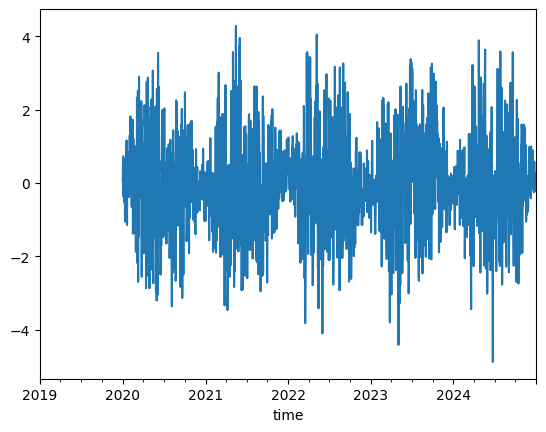

In [ ]:
df_daily['Seasonal First Difference'].plot()

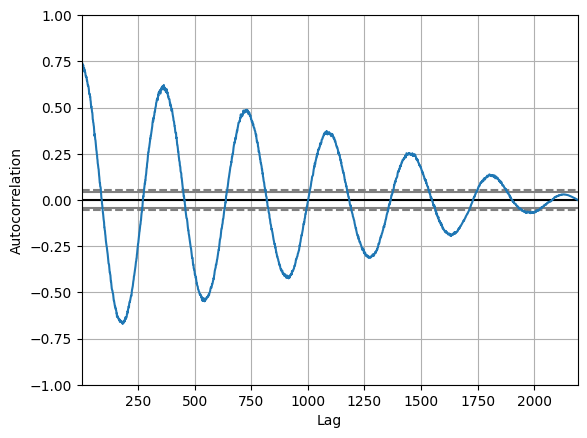

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_daily['PV_Output'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

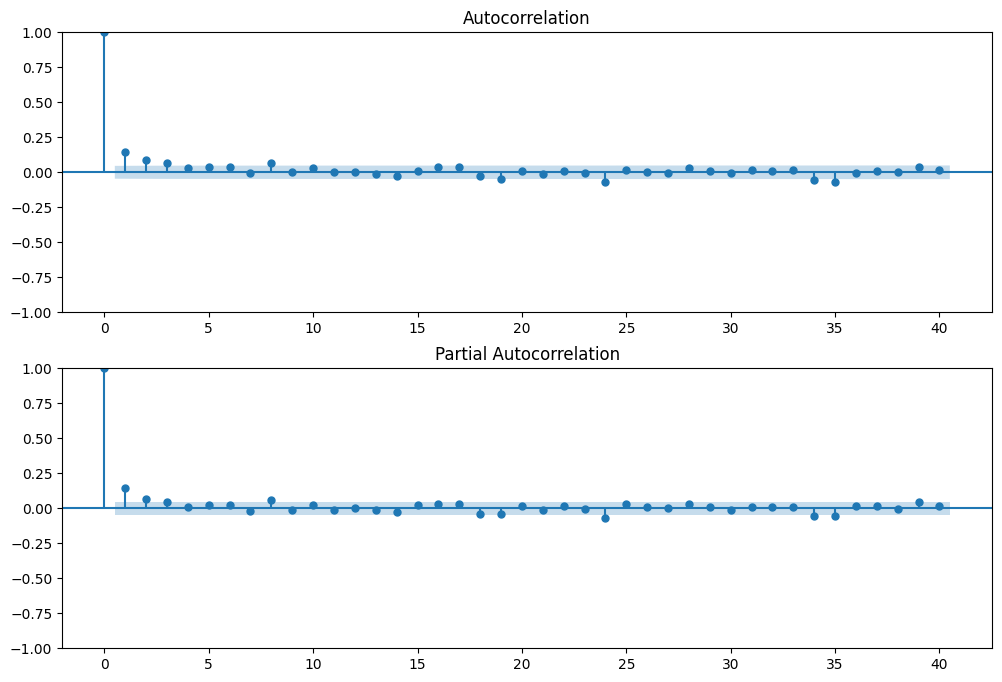

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_daily['Seasonal First Difference'].iloc[366:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_daily['Seasonal First Difference'].iloc[366:],lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
df_daily.head()

,Humidity,Irradiance,Temperature_C,Cloud_Cover,Snowfall,PV_Output,PV_Output_FD,Seasonal First Difference
time,,,,,,,,
2019-01-01,0.136,144.779,140.444,20.443,0.000,0.068,NaN,NaN
2019-01-02,0.131,584.609,148.649,13.754,0.000,0.588,0.520,NaN
2019-01-03,0.120,317.552,143.394,17.781,0.000,0.199,-0.389,NaN
2019-01-04,0.112,497.333,77.887,14.528,0.000,0.416,0.217,NaN
2019-01-05,0.142,474.780,160.730,15.532,0.023,0.550,0.134,NaN


In [ ]:
df_train = df_daily.iloc[:1826]
df_test = df_daily.iloc[1826:]
df_train.tail()

,Humidity,Irradiance,Temperature_C,Cloud_Cover,Snowfall,PV_Output,PV_Output_FD,Seasonal First Difference
time,,,,,,,,
2023-12-27,0.154,534.633,200.067,18.576,0.0,0.511,0.157,-0.449
2023-12-28,0.168,537.029,233.010,21.024,0.0,0.528,0.017,0.068
2023-12-29,0.176,439.871,247.826,22.983,0.0,0.339,-0.189,-0.174
2023-12-30,0.166,581.211,215.315,22.963,0.0,0.636,0.297,0.053
2023-12-31,0.155,319.449,209.459,22.191,0.0,0.205,-0.431,-0.089


In [ ]:
df_test.head()

,Humidity,Irradiance,Temperature_C,Cloud_Cover,Snowfall,PV_Output,PV_Output_FD,Seasonal First Difference
time,,,,,,,,
2024-01-01,0.141,334.891,183.853,19.680,0.0,0.222,0.017,-0.567
2024-01-02,0.123,403.409,136.829,19.861,0.0,0.282,0.060,-0.010
2024-01-03,0.126,589.888,137.932,14.023,0.0,0.604,0.322,-0.001
2024-01-04,0.116,711.055,114.538,14.222,0.0,0.817,0.213,0.438
2024-01-05,0.133,262.650,151.602,20.910,0.0,0.144,-0.673,-0.506


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
def calculate_error_metrics(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    mse = mean_squared_error(y_true, y_pred)

    mae = mean_absolute_error(y_true, y_pred)


    naive_forecast = np.roll(y_true, 1)[1:]
    naive_error = np.mean(np.abs(y_true[1:] - naive_forecast))
    mase = mae / naive_error if naive_error != 0 else np.inf

    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

    return {
        'MSE': mse,
        'MAE': mae,
        'MAPE': mape,
        'MASE': mase
    }

In [ ]:
model1 = ARIMA(df_train['PV_Output'],order=(0,0,1))
model1_fit=model1.fit()

In [ ]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              PV_Output   No. Observations:                 1826
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3183.732
Date:                Sat, 16 Aug 2025   AIC                           6373.463
Time:                        15:10:28   BIC                           6389.993
Sample:                    01-01-2019   HQIC                          6379.561
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6126      0.053     48.924      0.000       2.508       2.717
ma.L1          0.5337      0.021     25.310      0.000       0.492       0.575
sigma2         1.9137      0.093     20.533      0.000       1.731       2.096
===================================================================================
Ljung-Box (L1) (Q):                 128.56   Jarque-Bera (JB):                96.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.41
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model2 = ARIMA(df_train['PV_Output'],order=(1,0,0))
model2_fit=model2.fit()

In [ ]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              PV_Output   No. Observations:                 1826
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2775.501
Date:                Sat, 16 Aug 2025   AIC                           5557.001
Time:                        15:10:28   BIC                           5573.531
Sample:                    01-01-2019   HQIC                          5563.098
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6046      0.123     21.232      0.000       2.364       2.845
ar.L1          0.7700      0.020     38.900      0.000       0.731       0.809
sigma2         1.2234      0.045     27.098      0.000       1.135       1.312
===================================================================================
Ljung-Box (L1) (Q):                 156.97   Jarque-Bera (JB):                31.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.30
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model3 = ARIMA(df_train['PV_Output'],order=(1,0,1))
model3_fit=model3.fit()

In [ ]:
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              PV_Output   No. Observations:                 1826
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2455.881
Date:                Sat, 16 Aug 2025   AIC                           4919.761
Time:                        15:10:28   BIC                           4941.801
Sample:                    01-01-2019   HQIC                          4927.891
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2736      0.742      3.065      0.002       0.820       3.727
ar.L1          0.9942      0.003    300.729      0.000       0.988       1.001
ma.L1         -0.8162      0.013    -62.871      0.000      -0.842      -0.791
sigma2         0.8614      0.029     29.518      0.000       0.804       0.919
===================================================================================
Ljung-Box (L1) (Q):                   3.42   Jarque-Bera (JB):                 4.76
Prob(Q):                              0.06   Prob(JB):                         0.09
Heteroskedasticity (H):               0.95   Skew:                            -0.12
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,Humidity,Irradiance,Temperature_C,Cloud_Cover,Snowfall,PV_Output,PV_Output_FD,Seasonal First Difference,forecast
time,,,,,,,,,
2024-01-01,0.141,334.891,183.853,19.680,0.0,0.222,0.017,-0.567,0.439823
2024-01-02,0.123,403.409,136.829,19.861,0.0,0.282,0.060,-0.010,0.450532
2024-01-03,0.126,589.888,137.932,14.023,0.0,0.604,0.322,-0.001,0.461179
2024-01-04,0.116,711.055,114.538,14.222,0.0,0.817,0.213,0.438,0.471763
2024-01-05,0.133,262.650,151.602,20.910,0.0,0.144,-0.673,-0.506,0.482286
...,...,...,...,...,...,...,...,...,...
2024-10-16,0.159,2582.009,236.732,7.734,0.0,2.863,1.719,-0.374,1.936132
2024-10-17,0.168,1215.389,228.992,18.046,0.0,0.900,-1.963,-1.984,1.938103
2024-10-18,0.168,1588.480,220.210,15.929,0.0,1.378,0.478,0.337,1.940062


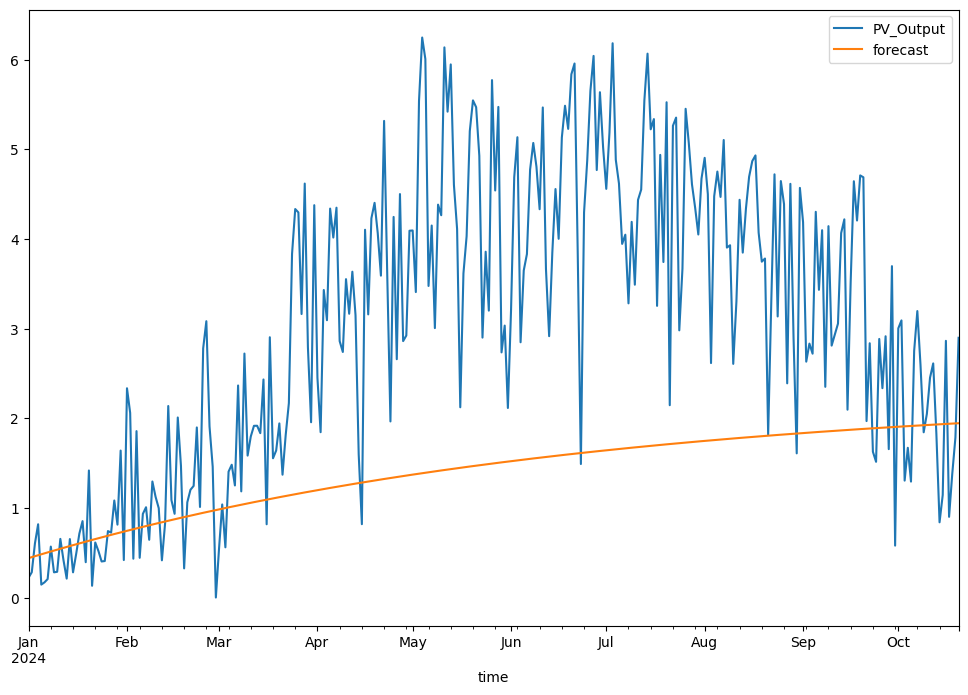

In [ ]:
df_daily['forecast']=model3_fit.predict(start=1826,end=2191,dynamic=True)
df_viz = df_daily.iloc[1826:2120]
df_viz[['PV_Output','forecast']].plot(figsize=(12,8))
df_viz

In [ ]:
metrics3 = calculate_error_metrics(df_viz['PV_Output'], df_viz['forecast'])

print("Error Metrics for model 3:")
for metric, value in metrics3.items():
    print(f"{metric}: {value:.4f}")

Error Metrics for model 3:
MSE: 4.7375
MAE: 1.7514
MAPE: 55.3843
MASE: 1.9598


,Humidity,Irradiance,Temperature_C,Cloud_Cover,Snowfall,PV_Output,PV_Output_FD,Seasonal First Difference,forecast
time,,,,,,,,,
2024-01-01,0.141,334.891,183.853,19.680,0.0,0.222,0.017,-0.567,1.656397
2024-01-02,0.123,403.409,136.829,19.861,0.0,0.282,0.060,-0.010,2.612606
2024-01-03,0.126,589.888,137.932,14.023,0.0,0.604,0.322,-0.001,2.612606
2024-01-04,0.116,711.055,114.538,14.222,0.0,0.817,0.213,0.438,2.612606
2024-01-05,0.133,262.650,151.602,20.910,0.0,0.144,-0.673,-0.506,2.612606
...,...,...,...,...,...,...,...,...,...
2024-10-16,0.159,2582.009,236.732,7.734,0.0,2.863,1.719,-0.374,2.612606
2024-10-17,0.168,1215.389,228.992,18.046,0.0,0.900,-1.963,-1.984,2.612606
2024-10-18,0.168,1588.480,220.210,15.929,0.0,1.378,0.478,0.337,2.612606


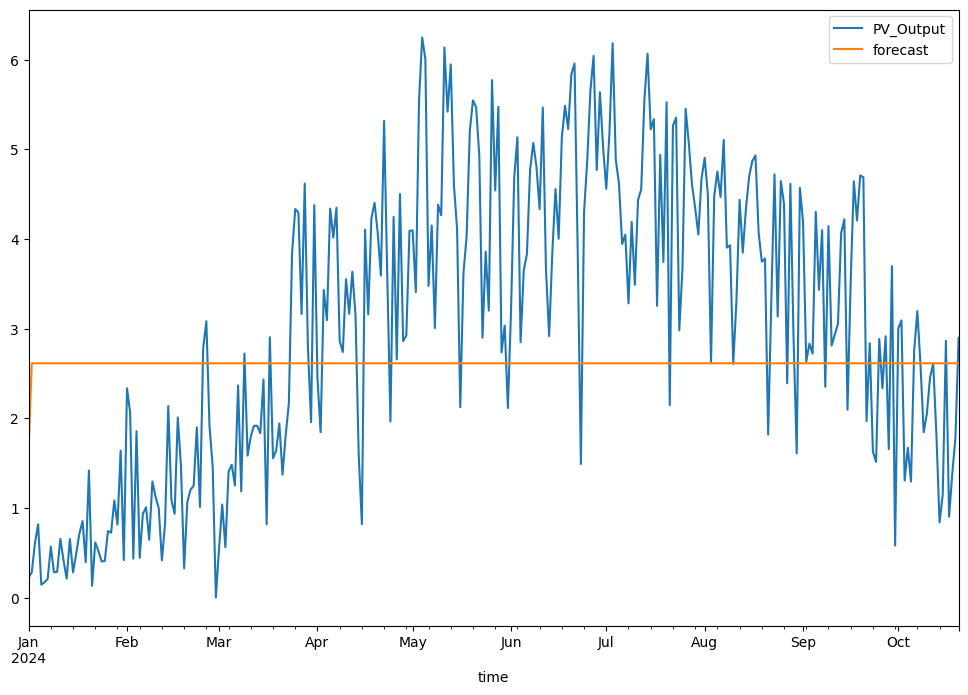

In [ ]:
df_daily['forecast']=model1_fit.predict(start=1826,end=2191,dynamic=True)
df_viz = df_daily.iloc[1826:2120]
df_viz[['PV_Output','forecast']].plot(figsize=(12,8))
df_viz

In [ ]:
metrics1 = calculate_error_metrics(df_viz['PV_Output'], df_viz['forecast'])

print("Error Metrics for model 1:")
for metric, value in metrics1.items():
    print(f"{metric}: {value:.4f}")

Error Metrics for model 1:
MSE: 2.8805
MAE: 1.4644
MAPE: 113.7699
MASE: 1.6386


,Humidity,Irradiance,Temperature_C,Cloud_Cover,Snowfall,PV_Output,PV_Output_FD,Seasonal First Difference,forecast
time,,,,,,,,,
2024-01-01,0.141,334.891,183.853,19.680,0.0,0.222,0.017,-0.567,0.756819
2024-01-02,0.123,403.409,136.829,19.861,0.0,0.282,0.060,-0.010,1.181741
2024-01-03,0.126,589.888,137.932,14.023,0.0,0.604,0.322,-0.001,1.508947
2024-01-04,0.116,711.055,114.538,14.222,0.0,0.817,0.213,0.438,1.760909
2024-01-05,0.133,262.650,151.602,20.910,0.0,0.144,-0.673,-0.506,1.954930
...,...,...,...,...,...,...,...,...,...
2024-10-16,0.159,2582.009,236.732,7.734,0.0,2.863,1.719,-0.374,2.604620
2024-10-17,0.168,1215.389,228.992,18.046,0.0,0.900,-1.963,-1.984,2.604620
2024-10-18,0.168,1588.480,220.210,15.929,0.0,1.378,0.478,0.337,2.604620


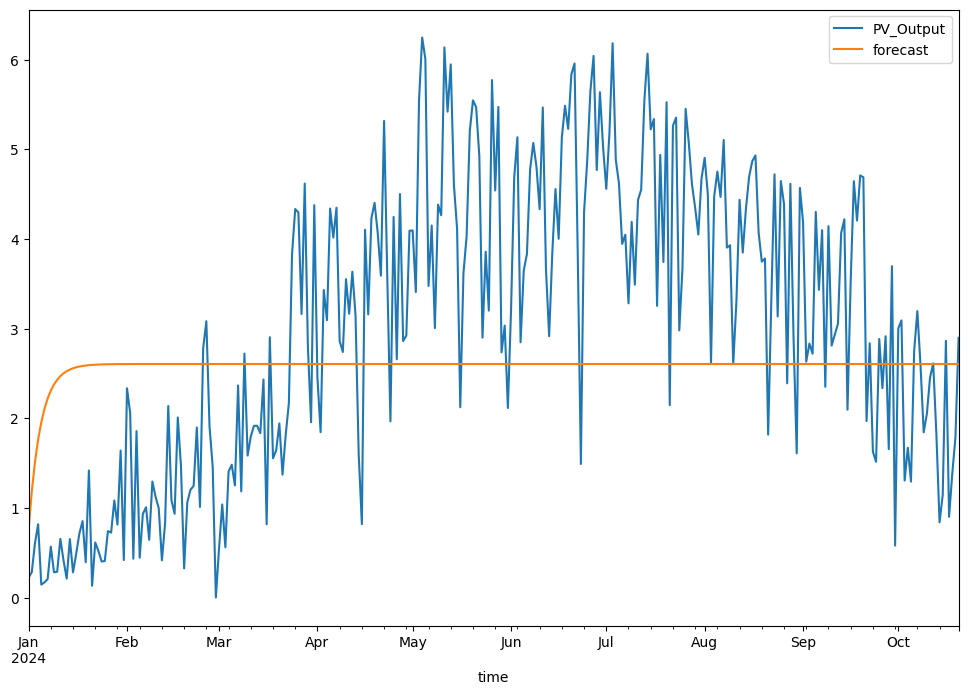

In [ ]:
df_daily['forecast']=model2_fit.predict(start=1826,end=2191,dynamic=True)
df_viz = df_daily.iloc[1826:2120]
df_viz[['PV_Output','forecast']].plot(figsize=(12,8))
df_viz

In [ ]:
metrics2 = calculate_error_metrics(df_viz['PV_Output'], df_viz['forecast'])

print("Error Metrics for model 2:")
for metric, value in metrics2.items():
    print(f"{metric}: {value:.4f}")

Error Metrics for model 2:
MSE: 2.8064
MAE: 1.4421
MAPE: 105.0821
MASE: 1.6137


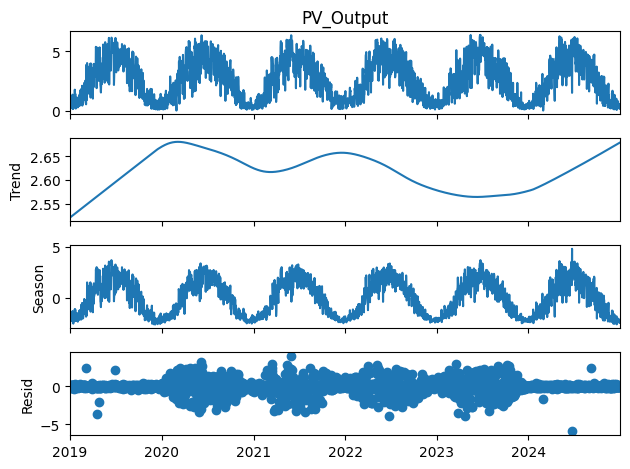

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_daily['PV_Output'], period=365, robust=True).fit()
fig = stl.plot(); plt.show()

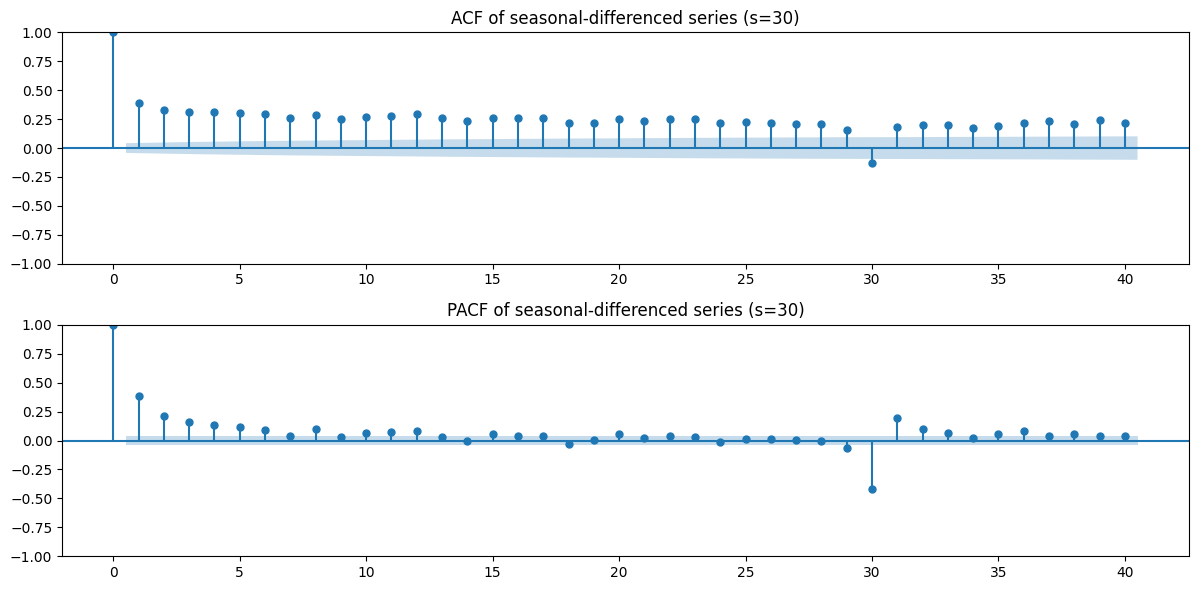

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
y = df_daily['PV_Output']
s = 30  # try 7 as an alternative if you suspect weekly effects

# Seasonal difference (D=1 candidate)
ys = y.diff(s).dropna()

fig, ax = plt.subplots(2,1, figsize=(12,6))
plot_acf(ys, lags=40, ax=ax[0])
plot_pacf(ys, lags=40, ax=ax[1])
ax[0].set_title(f'ACF of seasonal-differenced series (s={s})')
ax[1].set_title(f'PACF of seasonal-differenced series (s={s})')
plt.tight_layout(); plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df_train['PV_Output'],order=(1, 0, 1),seasonal_order=(1,1,1,120))
results=model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           PV_Output   No. Observations:                 1826
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 120)   Log Likelihood               -2463.993
Date:                             Sat, 16 Aug 2025   AIC                           4937.987
Time:                                     15:30:26   BIC                           4965.196
Sample:                                 01-01-2019   HQIC                          4948.058
                                      - 12-31-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9951      0.003    296.726      0.000       0.989       1.002
ma.L1         -0.8168      0.014    -59.285      0.000      -0.844      -0.790
ar.S.L120     -0.0476      0.031     -1.532      0.126      -0.109       0.013
ma.S.L120     -0.9126      0.041    -22.336      0.000      -0.993      -0.833
sigma2         0.9257      0.039     23.496      0.000       0.848       1.003
===================================================================================
Ljung-Box (L1) (Q):                   3.36   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.07   Prob(JB):                         0.54
Heteroskedasticity (H):               0.96   Skew:                            -0.05
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='time'>

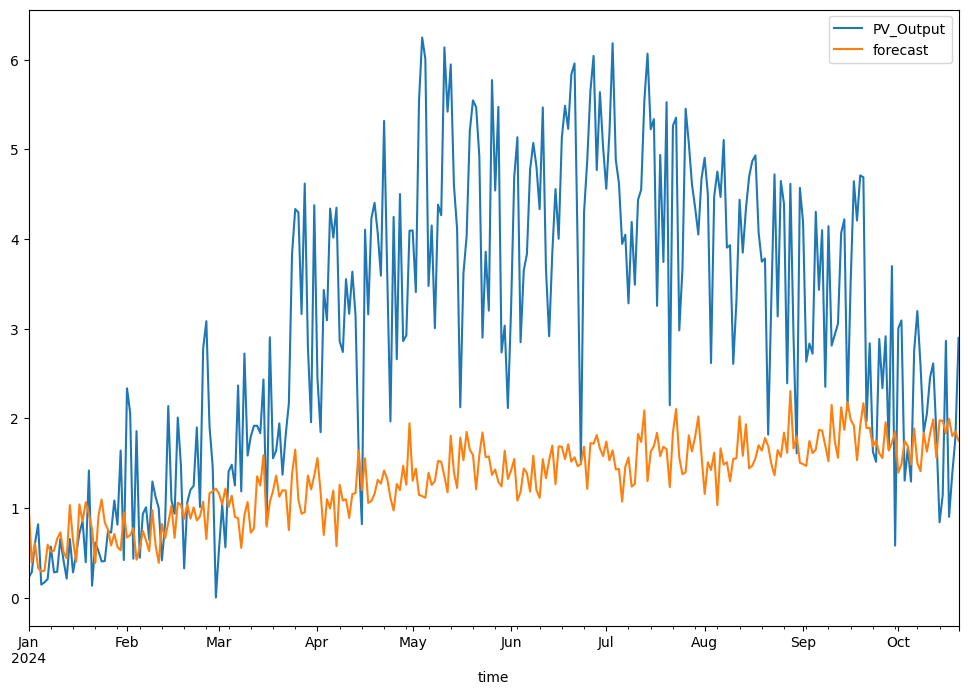

In [ ]:
df_daily['forecast']=results.predict(start=1826,end=2191,dynamic=True)
df_viz = df_daily.iloc[1826:2120]
df_viz[['PV_Output','forecast']].plot(figsize=(12,8))

In [ ]:
metrics_SARIMA = calculate_error_metrics(df_viz['PV_Output'], df_viz['forecast'])

print("Error Metrics for SARIMA Model 1 120 days seasonality:")
for metric, value in metrics_SARIMA.items():
    print(f"{metric}: {value:.4f}")

Error Metrics for SARIMA Model 1 120 days seasonality:
MSE: 5.0667
MAE: 1.8200
MAPE: 58.8536
MASE: 2.0366


In [ ]:
model1=sm.tsa.statespace.SARIMAX(df_train['PV_Output'],order=(1, 0, 1),seasonal_order=(1,1,1,30))
results=model1.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          PV_Output   No. Observations:                 1826
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 30)   Log Likelihood               -2467.802
Date:                            Sat, 16 Aug 2025   AIC                           4945.604
Time:                                    15:31:10   BIC                           4973.071
Sample:                                01-01-2019   HQIC                          4955.744
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9954      0.003    303.019      0.000       0.989       1.002
ma.L1         -0.8214      0.013    -62.183      0.000      -0.847      -0.796
ar.S.L30       0.0337      0.022      1.500      0.134      -0.010       0.078
ma.S.L30      -0.9997      1.244     -0.804      0.422      -3.437       1.438
sigma2         0.8554      1.058      0.808      0.419      -1.219       2.930
===================================================================================
Ljung-Box (L1) (Q):                   3.40   Jarque-Bera (JB):                 4.23
Prob(Q):                              0.07   Prob(JB):                         0.12
Heteroskedasticity (H):               0.95   Skew:                            -0.11
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='time'>

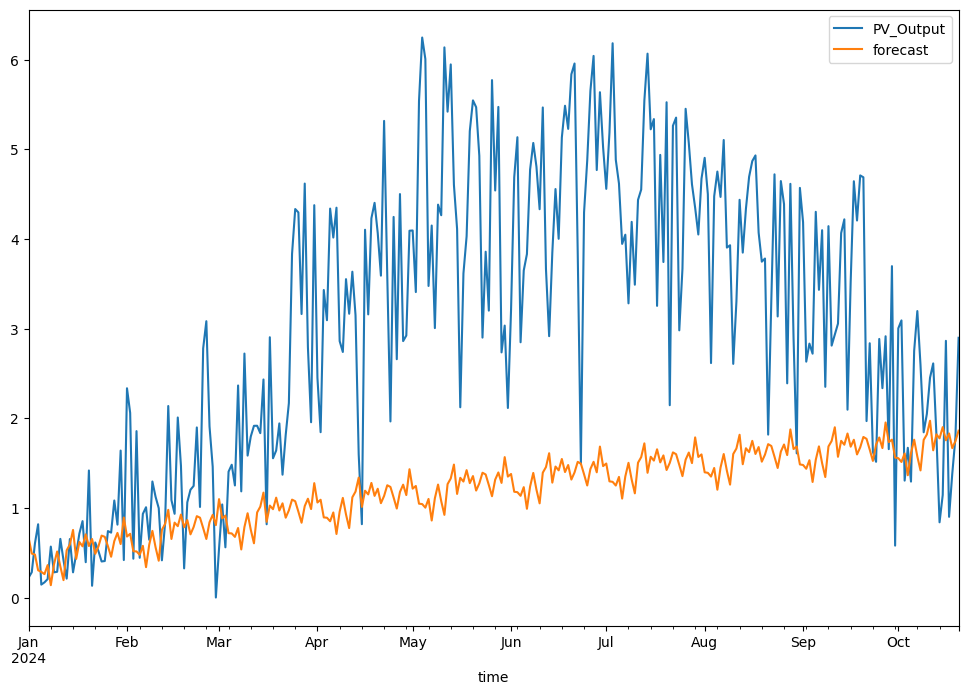

In [ ]:
df_daily['forecast']=results.predict(start=1826,end=2191,dynamic=True)
df_viz = df_daily.iloc[1826:2120]
df_viz[['PV_Output','forecast']].plot(figsize=(12,8))

In [ ]:
metrics_SARIMA = calculate_error_metrics(df_viz['PV_Output'], df_viz['forecast'])

print("Error Metrics for SARIMA Model 1 30 days seasonality:")
for metric, value in metrics_SARIMA.items():
    print(f"{metric}: {value:.4f}")

Error Metrics for SARIMA Model 1 30 days seasonality:
MSE: 5.4890
MAE: 1.9055
MAPE: 59.1895
MASE: 2.1322


In [ ]:
model2=sm.tsa.statespace.SARIMAX(df_train['PV_Output'],order=(1, 0, 1),seasonal_order=(2,1,1,30))
results=model2.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          PV_Output   No. Observations:                 1826
Model:             SARIMAX(1, 0, 1)x(2, 1, 1, 30)   Log Likelihood               -2467.756
Date:                            Sat, 16 Aug 2025   AIC                           4947.512
Time:                                    15:33:43   BIC                           4980.472
Sample:                                01-01-2019   HQIC                          4959.680
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9953      0.003    302.327      0.000       0.989       1.002
ma.L1         -0.8215      0.013    -62.129      0.000      -0.847      -0.796
ar.S.L30       0.0337      0.023      1.479      0.139      -0.011       0.078
ar.S.L60       0.0074      0.024      0.309      0.757      -0.040       0.055
ma.S.L30      -0.9995      0.804     -1.243      0.214      -2.576       0.577
sigma2         0.8556      0.682      1.255      0.209      -0.481       2.192
===================================================================================
Ljung-Box (L1) (Q):                   3.39   Jarque-Bera (JB):                 4.23
Prob(Q):                              0.07   Prob(JB):                         0.12
Heteroskedasticity (H):               0.94   Skew:                            -0.11
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='time'>

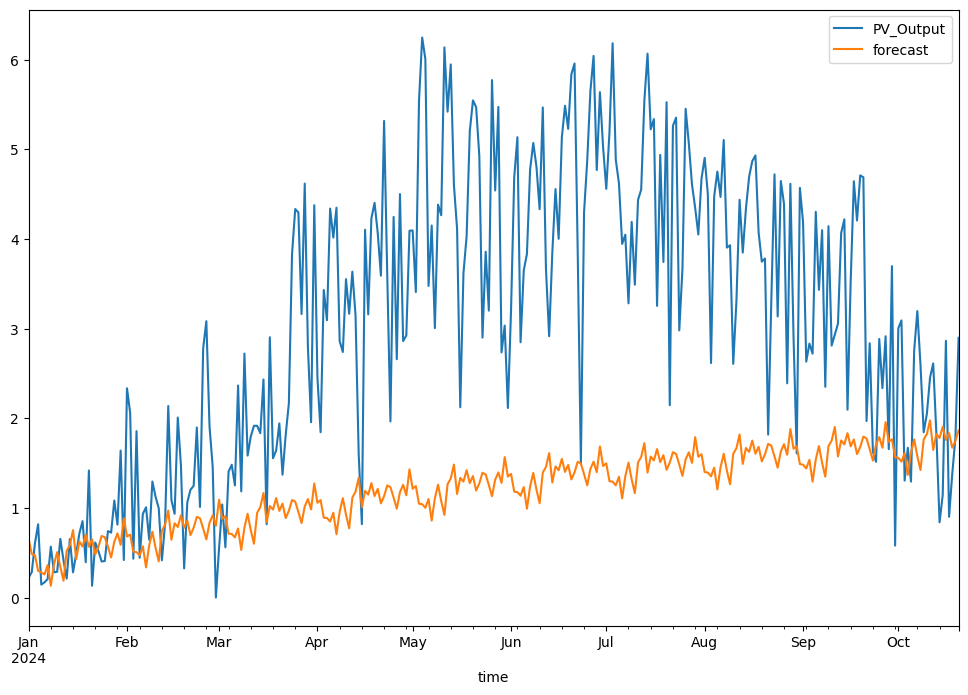

In [ ]:
df_daily['forecast']=results.predict(start=1826,end=2191,dynamic=True)
df_viz = df_daily.iloc[1826:2120]
df_viz[['PV_Output','forecast']].plot(figsize=(12,8))

In [ ]:
model3=sm.tsa.statespace.SARIMAX(df_train['PV_Output'],order=(1, 0, 1),seasonal_order=(1,1,2,30))
results=model3.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                               PV_Output   No. Observations:                 1826
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 30)   Log Likelihood               -2467.211
Date:                                 Sat, 16 Aug 2025   AIC                           4946.422
Time:                                         15:35:51   BIC                           4979.382
Sample:                                     01-01-2019   HQIC                          4958.590
                                          - 12-31-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9956      0.003    311.921      0.000       0.989       1.002
ma.L1         -0.8192      0.013    -61.444      0.000      -0.845      -0.793
ar.S.L30      -0.9840      0.048    -20.411      0.000      -1.078      -0.889
ma.S.L30      -0.0009     38.595  -2.45e-05      1.000     -75.646      75.644
ma.S.L60      -0.9990     38.368     -0.026      0.979     -76.200      74.202
sigma2         0.8492     32.618      0.026      0.979     -63.081      64.780
===================================================================================
Ljung-Box (L1) (Q):                   3.39   Jarque-Bera (JB):                 4.44
Prob(Q):                              0.07   Prob(JB):                         0.11
Heteroskedasticity (H):               0.94   Skew:                            -0.12
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='time'>

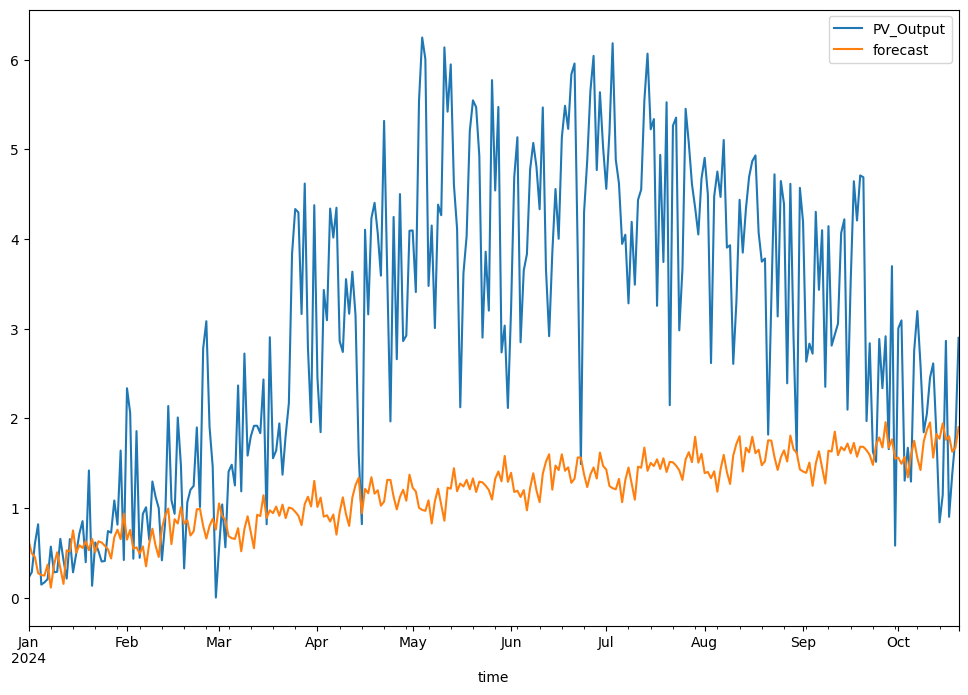

In [ ]:
df_daily['forecast']=results.predict(start=1826,end=2191,dynamic=True)
df_viz = df_daily.iloc[1826:2120]
df_viz[['PV_Output','forecast']].plot(figsize=(12,8))

In [ ]:
metrics_SARIMA = calculate_error_metrics(df_viz['PV_Output'], df_viz['forecast'])

print("Error Metrics for SARIMA Model 1 30 days seasonality:")
for metric, value in metrics_SARIMA.items():
    print(f"{metric}: {value:.4f}")

Error Metrics for SARIMA Model 1 30 days seasonality:
MSE: 5.5890
MAE: 1.9235
MAPE: 59.4889
MASE: 2.1524
